In [148]:
import pandas as pd
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
jsonFile = open("./log/result.json", 'r')
data = json.load(jsonFile)

In [150]:
task_df = pd.DataFrame(data['task']).T
task_df['last_update_time'] = pd.to_datetime(task_df['last_update_time'], unit='ms')
task_df['create_time'] = pd.to_datetime(task_df['create_time'], unit='ms')
task_df['wait_alloc_time'] /= 60000
task_df['wait_vehicle_time'] /= 60000
task_df['wait_total_time'] = task_df['wait_alloc_time'] + task_df['wait_vehicle_time']

# to koran time
task_df['last_update_time'] = pd.DatetimeIndex(task_df['last_update_time'] + timedelta(hours=9))
task_df['create_time'] = pd.DatetimeIndex(task_df['create_time'] + timedelta(hours=9))

In [157]:
grouping_df = task_df.groupby([pd.Grouper(key='create_time',freq='1H')])['wait_vehicle_time', 'wait_alloc_time', 'wait_total_time'].mean().reset_index().sort_values(['create_time'])
grouping_df['create_time'] = grouping_df['create_time'].dt.hour

/var/folders/xm/h7qj67pn08v89vfss39pt2980000gn/T/ipykernel_86871/726511240.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouping_df = task_df.groupby([pd.Grouper(key='create_time',freq='1H')])['wait_vehicle_time', 'wait_alloc_time', 'wait_total_time'].mean().reset_index().sort_values(['create_time'])


In [158]:
grouping_df.rename(columns={'create_time':'시간대', 'wait_vehicle_time':'배차 후 대기시간', 'wait_alloc_time':'배차 요청 후 대기시간', 'wait_total_time': '배차요청 후 총 대기시간'})


,시간대,배차 후 대기시간,배차 요청 후 대기시간,배차요청 후 총 대기시간
0,0,67.428571,0.000000,67.428571
1,1,71.818182,0.000000,71.818182
2,2,81.000000,0.000000,81.000000
3,3,81.250000,0.000000,81.250000
4,4,83.750000,0.000000,83.750000
5,5,55.625000,0.000000,55.625000
6,6,78.230769,0.000000,78.230769
7,7,92.681818,0.000000,92.681818
8,8,74.216216,0.000000,74.216216
9,9,67.550000,0.000000,67.550000


In [160]:
plot1 = plt.figure(figsize = (8,4))
plt.rcParams['font.family'] = 'AppleGothic'
sns.barplot(x = '시간대', y = '배차 후 대기시간',data = grouping_df)
#sns.lineplot(x = 'create_time', y='wait_alloc_time', data = grouping_df)
plt.savefig("../img/wait-vehicle-time.png")

ValueError: Could not interpret input '시간대'

<Figure size 800x400 with 0 Axes>

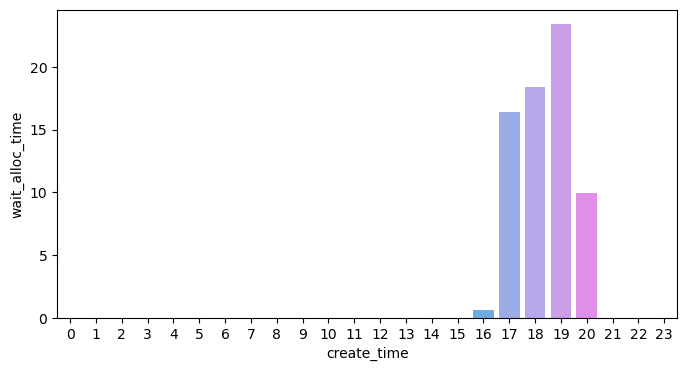

In [129]:
plt2 = plt.figure(figsize = (8,4))
sns.barplot(x = 'create_time', y = 'wait_alloc_time',data = grouping_df)
plt.savefig("../img/wait-alloc-time.png")

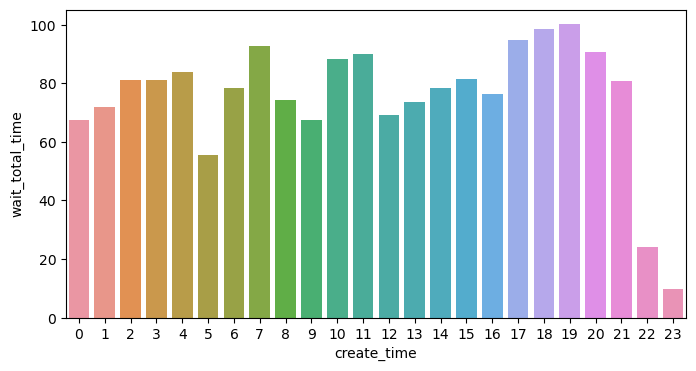

In [130]:
plt3 = plt.figure(figsize = (8,4))
sns.barplot(x = 'create_time', y = 'wait_total_time',data = grouping_df)
plt.savefig("../img/wait-total-time.png")

In [131]:
v_df = pd.DataFrame(data['vehicle']).T

v_df['wait_alloc_time'] /= 60000
v_df['moving_to_load_time'] /= 60000

v_alloc_time_avg = v_df['wait_alloc_time'].mean()
v_moving_to_load_time = v_df['moving_to_load_time'].mean()

In [151]:
event_list = []

for v_event in v_df['empty_event']:
    first_event = True
    for event in v_event:
        if first_event:
            first_event = False
            continue
        event_list.append(event)


    time  empty_time
0      1   89.000000
1      2  156.000000
2      3  161.000000
3      4  125.625000
4      5  108.571429
5      6   81.571429
6      7   87.500000
7      8   98.250000
8      9  151.641026
9     10  192.648649
10    11  150.714286
11    12   90.590909
12    13  100.538462
13    14   94.823529
14    15   97.718750
15    16   88.657143
16    17   92.225000
17    18   85.571429
18    19   89.880000
19    20  109.687500
20    21   97.142857
21    22   68.333333


ValueError: Could not interpret input '시간'

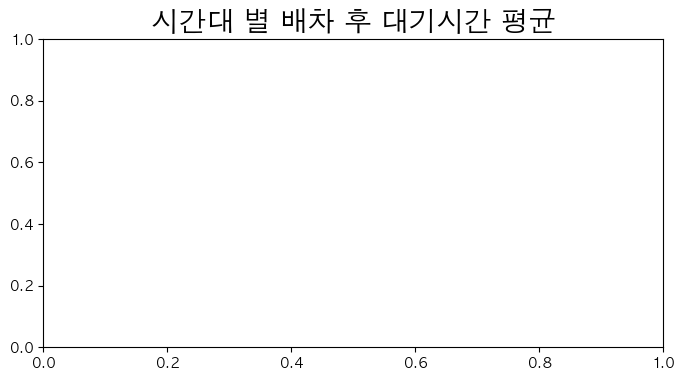

In [156]:

event_df = pd.DataFrame(event_list, columns=['time', 'empty_time'])
event_df['time'] = pd.to_datetime(event_df['time'], unit='ms')
event_df['empty_time'] /= 60000
#task_df['last_update_time'] = pd.to_datetime(task_df['last_update_time'], unit='ms')

# to koran time
event_df['time'] = pd.DatetimeIndex(event_df['time'] + timedelta(hours=9))
event_df

event_df_g = event_df.groupby([pd.Grouper(key='time',freq='1H')])['empty_time'].mean().reset_index().sort_values(['time'])
event_df_g['time'] = event_df_g['time'].dt.hour

plt.figure(figsize = (8,4))
plt.rcParams['font.family'] = 'AppleGothic'
plt.title("시간대 별 배차 후 대기시간 평균", fontsize=20)
sns.barplot(x = 'time', y = 'empty_time', data = event_df_g)
plt.savefig("../img/vehicle-empty-time.png")
plt.show()